In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

Deutsch Algorithm - 0 (IBM)(both balanced and constant)

In [2]:
from qiskit import QuantumCircuit

def deutsch_function(case: int):
    """
    Generate a valid Deutsch function as a `QuantumCircuit`.
    """
    if case not in [1, 2, 3, 4]:
        raise ValueError("`case` must be 1, 2, 3, or 4.")

    f = QuantumCircuit(2)
    if case in [2, 3]:
        f.cx(0, 1)
    if case in [3, 4]:
        f.x(1)
    return f

display(deutsch_function(3).draw())

q_0: ──■───────
     ┌─┴─┐┌───┐
q_1: ┤ X ├┤ X ├
     └───┘└───┘

In [3]:
def compile_circuit(function: QuantumCircuit):
    """
    Compiles a circuit for use in Deutsch's algorithm.
    """
    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)

    qc.x(n)
    qc.h(range(n + 1))

    qc.barrier()
    qc.compose(function, inplace=True)
    qc.barrier()

    qc.h(range(n))
    qc.measure(range(n), range(n))

    return qc

display(compile_circuit(deutsch_function(3)).draw())

┌───┐      ░            ░ ┌───┐┌─┐
q_0: ┤ H ├──────░───■────────░─┤ H ├┤M├
     ├───┤┌───┐ ░ ┌─┴─┐┌───┐ ░ └───┘└╥┘
q_1: ┤ X ├┤ H ├─░─┤ X ├┤ X ├─░───────╫─
     └───┘└───┘ ░ └───┘└───┘ ░       ║ 
c: 1/════════════════════════════════╩═
                                     0

In [4]:
from qiskit_aer import AerSimulator

def deutsch_algorithm(function: QuantumCircuit):
    """
    Determine if a Deutsch function is constant or balanced.
    """
    qc = compile_circuit(function)

    result = AerSimulator().run(qc, shots=1, memory=True).result()
    measurements = result.get_memory()
    print(measurements)
    if measurements[0] == "0":
        return "constant"
    return "balanced"

for i in range(4):
    f = compile_circuit(deutsch_function(i+1))
    
    simulator = Aer.get_backend('qasm_simulator')
    result = simulator.run(f).result()
    counts = result.get_counts(f)
    
    display(f.draw())
    print(counts)
    display(deutsch_algorithm(deutsch_function(i+1)))

┌───┐      ░  ░ ┌───┐┌─┐
q_0: ┤ H ├──────░──░─┤ H ├┤M├
     ├───┤┌───┐ ░  ░ └───┘└╥┘
q_1: ┤ X ├┤ H ├─░──░───────╫─
     └───┘└───┘ ░  ░       ║ 
c: 1/══════════════════════╩═
                           0

{'0': 1024}
['0']


'constant'

┌───┐      ░       ░ ┌───┐┌─┐
q_0: ┤ H ├──────░───■───░─┤ H ├┤M├
     ├───┤┌───┐ ░ ┌─┴─┐ ░ └───┘└╥┘
q_1: ┤ X ├┤ H ├─░─┤ X ├─░───────╫─
     └───┘└───┘ ░ └───┘ ░       ║ 
c: 1/═══════════════════════════╩═
                                0

{'1': 1024}
['1']


'balanced'

┌───┐      ░            ░ ┌───┐┌─┐
q_0: ┤ H ├──────░───■────────░─┤ H ├┤M├
     ├───┤┌───┐ ░ ┌─┴─┐┌───┐ ░ └───┘└╥┘
q_1: ┤ X ├┤ H ├─░─┤ X ├┤ X ├─░───────╫─
     └───┘└───┘ ░ └───┘└───┘ ░       ║ 
c: 1/════════════════════════════════╩═
                                     0

{'1': 1024}
['1']


'balanced'

┌───┐      ░       ░ ┌───┐┌─┐
q_0: ┤ H ├──────░───────░─┤ H ├┤M├
     ├───┤┌───┐ ░ ┌───┐ ░ └───┘└╥┘
q_1: ┤ X ├┤ H ├─░─┤ X ├─░───────╫─
     └───┘└───┘ ░ └───┘ ░       ║ 
c: 1/═══════════════════════════╩═
                                0

{'0': 1024}
['0']


'constant'

Deutsch Algorithm - 1 (youtube)(constant)

In [5]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.id(qreg_q[1])
circuit.x(qreg_q[0])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.barrier(qreg_q[1])
circuit.barrier(qreg_q[0])
circuit.id(qreg_q[1])
circuit.id(qreg_q[0])
circuit.barrier(qreg_q[0])
circuit.barrier(qreg_q[1])
circuit.h(qreg_q[1])
circuit.measure(qreg_q[1], creg_c[0])

simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(circuit).result()
counts = result.get_counts(circuit)

is_constant = len(counts) == 1  # If there is only one measurement outcome, it's constant
result_type = "constant" if is_constant else "balanced"

print(circuit)
print("Measurement result:", counts)
print("Function is", result_type)

     ┌───┐┌───┐ ░ ┌───┐ ░         
q_0: ┤ X ├┤ H ├─░─┤ I ├─░─────────
     ├───┤├───┤ ░ ├───┤ ░ ┌───┐┌─┐
q_1: ┤ I ├┤ H ├─░─┤ I ├─░─┤ H ├┤M├
     └───┘└───┘ ░ └───┘ ░ └───┘└╥┘
c: 1/═══════════════════════════╩═
                                0 
Measurement result: {'0': 1024}
Function is constant


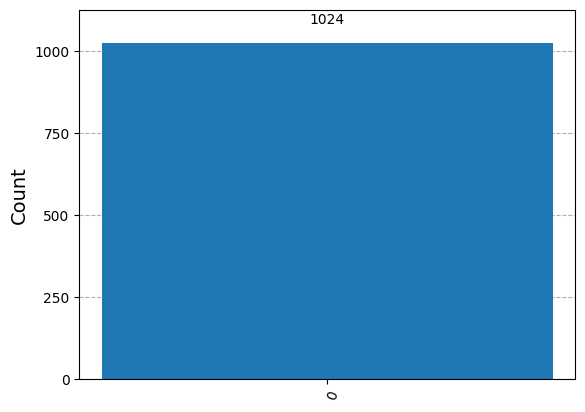

In [6]:
plot_histogram(counts)

Deutsch Algorithm - 2 (balanced)(from medium)

In [18]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.x(qreg_q[1])
circuit.h(qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(circuit).result()
counts = result.get_counts(circuit)

is_constant = len(counts) == 1  # If there is only one measurement outcome, it's constant
result_type = "constant" if is_constant else "balanced"

print(circuit)
print("Measurement result:", counts)
print("Function is", result_type)

     ┌───┐               ┌───┐┌─┐
q_0: ┤ H ├────────────■──┤ H ├┤M├
     ├───┤┌───┐┌───┐┌─┴─┐└───┘└╥┘
q_1: ┤ H ├┤ X ├┤ H ├┤ X ├──────╫─
     └───┘└───┘└───┘└───┘      ║ 
c: 1/══════════════════════════╩═
                               0 
Measurement result: {'1': 504, '0': 520}
Function is balanced


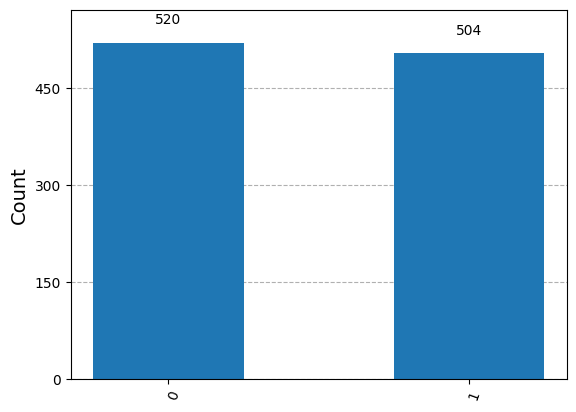

In [8]:
plot_histogram(counts)

Deutsch Algorithm - 2 (constant)(from medium)

In [9]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[0])
circuit.x(qreg_q[1])
circuit.h(qreg_q[1])
circuit.barrier(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(circuit).result()
counts = result.get_counts(circuit)

is_constant = len(counts) == 1  # If there is only one measurement outcome, it's constant
result_type = "constant" if is_constant else "balanced"

print(circuit)
print("Measurement result:", counts)
print("Function is", result_type)

     ┌───┐┌───┐  ░  ┌─┐
q_0: ┤ H ├┤ H ├──░──┤M├
     ├───┤├───┤┌───┐└╥┘
q_1: ┤ H ├┤ X ├┤ H ├─╫─
     └───┘└───┘└───┘ ║ 
c: 1/════════════════╩═
                     0 
Measurement result: {'0': 1024}
Function is constant


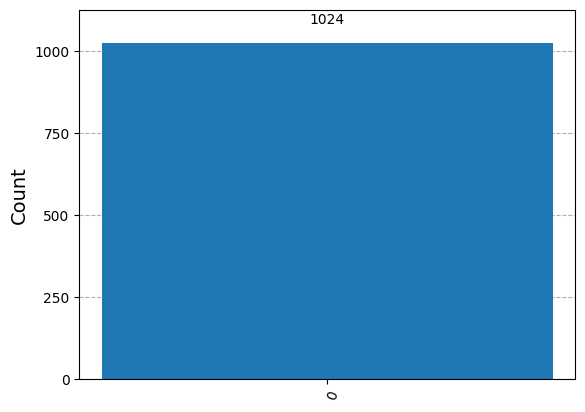

In [10]:
plot_histogram(counts)

Deutsch Algorithm - 3 (gemini)(balanced)

In [11]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.x(qreg_q[0])
circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(circuit).result()
counts = result.get_counts(circuit)

is_constant = len(counts) == 1  # If there is only one measurement outcome, it's constant
result_type = "constant" if is_constant else "balanced"

print(circuit)
print("Measurement result:", counts)
print("Function is", result_type)

     ┌───┐┌───┐     ┌───┐┌─┐
q_0: ┤ X ├┤ H ├──■──┤ H ├┤M├
     └───┘└───┘┌─┴─┐└───┘└╥┘
q_1: ──────────┤ X ├──────╫─
               └───┘      ║ 
c: 1/═════════════════════╩═
                          0 
Measurement result: {'0': 505, '1': 519}
Function is balanced


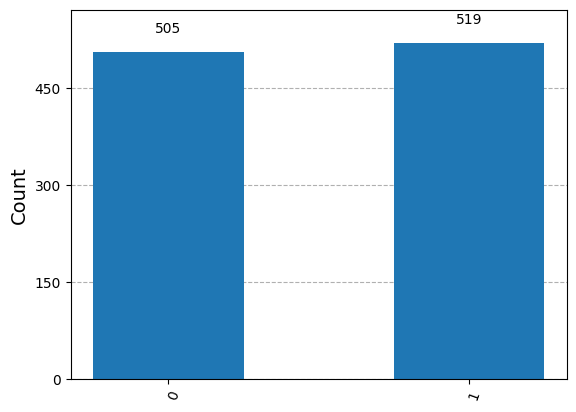

In [12]:
plot_histogram(counts)

Deutsch Algorithm - 4 (ChatGPT)(constant)

In [13]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.x(qreg_q[1])
circuit.h(qreg_q[1])
circuit.barrier(qreg_q[0])
circuit.barrier(qreg_q[1])
circuit.barrier(qreg_q[0])
circuit.id(qreg_q[0])
circuit.id(qreg_q[1])
circuit.barrier(qreg_q[1])
circuit.barrier(qreg_q[0])
circuit.h(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(circuit).result()
counts = result.get_counts(circuit)

is_constant = len(counts) == 1  # If there is only one measurement outcome, it's constant
result_type = "constant" if is_constant else "balanced"

print(circuit)
print("Measurement result:", counts)
print("Function is", result_type)

     ┌───┐  ░   ░ ┌───┐ ░ ┌───┐┌─┐
q_0: ┤ H ├──░───░─┤ I ├─░─┤ H ├┤M├
     ├───┤┌───┐ ░ ├───┤ ░ └───┘└╥┘
q_1: ┤ X ├┤ H ├─░─┤ I ├─░───────╫─
     └───┘└───┘ ░ └───┘ ░       ║ 
c: 1/═══════════════════════════╩═
                                0 
Measurement result: {'0': 1024}
Function is constant


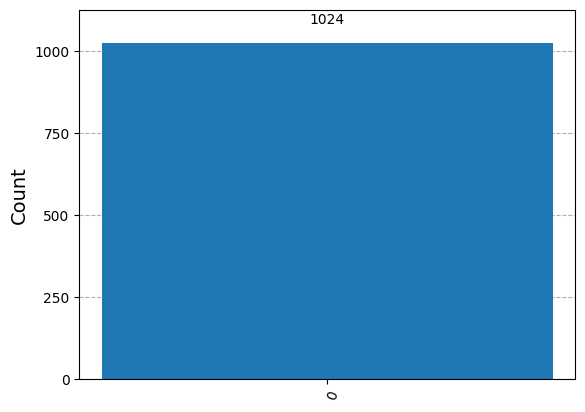

In [14]:
plot_histogram(counts)

Deutsch Algorithm - 4 (ChatGPT)(balanced(not actually))

In [15]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.x(qreg_q[1])
circuit.h(qreg_q[1])
circuit.barrier(qreg_q[0])
circuit.barrier(qreg_q[0])
circuit.barrier(qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.barrier(qreg_q[0])
circuit.barrier(qreg_q[1])
circuit.h(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(circuit).result()
counts = result.get_counts(circuit)

is_constant = len(counts) == 1  # If there is only one measurement outcome, it's constant
result_type = "constant" if is_constant else "balanced"

print(circuit)
print("Measurement result:", counts)
print("Function is", result_type)

     ┌───┐  ░   ░       ░ ┌───┐┌─┐
q_0: ┤ H ├──░───░───■───░─┤ H ├┤M├
     ├───┤┌───┐ ░ ┌─┴─┐ ░ └───┘└╥┘
q_1: ┤ X ├┤ H ├─░─┤ X ├─░───────╫─
     └───┘└───┘ ░ └───┘ ░       ║ 
c: 1/═══════════════════════════╩═
                                0 
Measurement result: {'1': 1024}
Function is constant


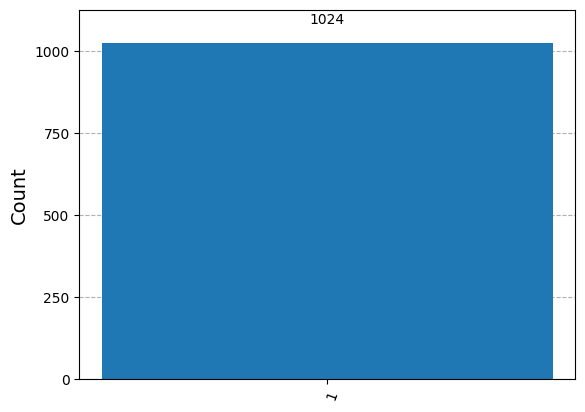

In [16]:
plot_histogram(counts)